# BSE Stock Price Prediction 

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

# Import Dataset

In [2]:
dataset=pd.read_csv('BSE.csv')

In [3]:
dataset

,0,Date,Open,High,Low,Close
0,1,05-Jan-2023,60847.50,60877.06,60049.84,60353.27
1,2,04-Jan-2023,61294.65,61327.21,60593.56,60657.45
2,3,03-Jan-2023,61074.88,61343.96,61004.04,61294.20
3,4,02-Jan-2023,60871.24,61222.79,60764.63,61167.79
4,5,30-Dec-2022,61329.16,61392.68,60743.71,60840.74
...,...,...,...,...,...,...
82,83,08-Sep-2022,59374.99,59711.96,59315.71,59688.22
83,84,07-Sep-2022,58789.26,59166.46,58722.89,59028.91
84,85,06-Sep-2022,59285.36,59566.67,58974.26,59196.99
85,86,05-Sep-2022,58814.08,59308.25,58812.20,59245.98


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       87 non-null     int64  
 1   Date    87 non-null     object 
 2   Open    87 non-null     float64
 3   High    87 non-null     float64
 4   Low     87 non-null     float64
 5   Close   87 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.2+ KB


In [5]:
dataset.drop(dataset.columns[0],axis=1,inplace=True)    #Drop the irrelevant columng

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    87 non-null     object 
 1   Open    87 non-null     float64
 2   High    87 non-null     float64
 3   Low     87 non-null     float64
 4   Close   87 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.5+ KB


In [7]:
dataset=dataset.dropna()    # Removing the Null Values
dataset["Close"]=pd.to_numeric(dataset.Close,errors='coerce')   #Converting into numeric value

In [8]:
dataset

,Date,Open,High,Low,Close
0,05-Jan-2023,60847.50,60877.06,60049.84,60353.27
1,04-Jan-2023,61294.65,61327.21,60593.56,60657.45
2,03-Jan-2023,61074.88,61343.96,61004.04,61294.20
3,02-Jan-2023,60871.24,61222.79,60764.63,61167.79
4,30-Dec-2022,61329.16,61392.68,60743.71,60840.74
...,...,...,...,...,...
82,08-Sep-2022,59374.99,59711.96,59315.71,59688.22
83,07-Sep-2022,58789.26,59166.46,58722.89,59028.91
84,06-Sep-2022,59285.36,59566.67,58974.26,59196.99
85,05-Sep-2022,58814.08,59308.25,58812.20,59245.98


In [9]:
trainData=dataset.iloc[:,4:5].values    #Close column as training data

In [10]:
trainData

array([[60353.27],
       [60657.45],
       [61294.2 ],
       [61167.79],
       [60840.74],
       [61133.88],
       [60910.28],
       [60927.43],
       [60566.42],
       [59845.29],
       [60826.22],
       [61067.24],
       [61702.29],
       [61806.19],
       [61337.81],
       [61799.03],
       [62677.91],
       [62533.3 ],
       [62130.57],
       [62181.67],
       [62570.68],
       [62410.68],
       [62626.36],
       [62834.6 ],
       [62868.5 ],
       [63284.19],
       [63099.65],
       [62681.84],
       [62504.8 ],
       [62293.64],
       [62272.68],
       [61510.58],
       [61418.96],
       [61144.84],
       [61663.48],
       [61750.6 ],
       [61980.72],
       [61872.99],
       [61624.15],
       [61795.04],
       [60613.7 ],
       [61033.55],
       [61185.15],
       [60950.36],
       [60836.41],
       [60906.09],
       [61121.35],
       [60746.59],
       [59959.85],
       [59756.84],
       [59543.96],
       [59831.66],
       [5930

In [11]:
sc=MinMaxScaler(feature_range=(0,1))    #Rescale data for better performance
trainData=sc.fit_transform(trainData)

In [12]:
trainData.shape

(87, 1)

In [13]:
X_train=[]
y_train=[]

for i in range (4,87):
    X_train.append(trainData[i-4:i,0])
    y_train.append(trainData[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)

In [14]:
trainData

array([[0.57363661],
       [0.61788593],
       [0.71051449],
       [0.69212552],
       [0.64454928],
       [0.6871926 ],
       [0.65466532],
       [0.65716015],
       [0.60464372],
       [0.49974033],
       [0.64243704],
       [0.67749843],
       [0.76987968],
       [0.7849941 ],
       [0.71685847],
       [0.78395253],
       [0.91180394],
       [0.8907674 ],
       [0.83218193],
       [0.83961549],
       [0.8962051 ],
       [0.87292977],
       [0.90430492],
       [0.93459777],
       [0.93952923],
       [1.        ],
       [0.97315481],
       [0.91237564],
       [0.88662148],
       [0.85590386],
       [0.85285479],
       [0.74199147],
       [0.72866343],
       [0.68878696],
       [0.76423396],
       [0.77690738],
       [0.81038313],
       [0.79471155],
       [0.75851259],
       [0.7833721 ],
       [0.61152158],
       [0.67259751],
       [0.69465089],
       [0.66049579],
       [0.64391939],
       [0.6540558 ],
       [0.68536985],
       [0.630

In [15]:
trainData[20:24,0]

array([0.8962051 , 0.87292977, 0.90430492, 0.93459777])

In [16]:
trainData[5,0]

0.6871926019350525

In [17]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(83, 4, 1)

# Building the Model

In [18]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [19]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 12, verbose=2)

Epoch 1/20
7/7 - 6s - loss: 0.3220 - 6s/epoch - 841ms/step
Epoch 2/20
7/7 - 0s - loss: 0.0929 - 72ms/epoch - 10ms/step
Epoch 3/20
7/7 - 0s - loss: 0.0725 - 71ms/epoch - 10ms/step
Epoch 4/20
7/7 - 0s - loss: 0.0592 - 69ms/epoch - 10ms/step
Epoch 5/20
7/7 - 0s - loss: 0.0444 - 75ms/epoch - 11ms/step
Epoch 6/20
7/7 - 0s - loss: 0.0394 - 73ms/epoch - 10ms/step
Epoch 7/20
7/7 - 0s - loss: 0.0310 - 63ms/epoch - 9ms/step
Epoch 8/20
7/7 - 0s - loss: 0.0256 - 62ms/epoch - 9ms/step
Epoch 9/20
7/7 - 0s - loss: 0.0212 - 67ms/epoch - 10ms/step
Epoch 10/20
7/7 - 0s - loss: 0.0172 - 74ms/epoch - 11ms/step
Epoch 11/20
7/7 - 0s - loss: 0.0195 - 70ms/epoch - 10ms/step
Epoch 12/20
7/7 - 0s - loss: 0.0189 - 61ms/epoch - 9ms/step
Epoch 13/20
7/7 - 0s - loss: 0.0182 - 62ms/epoch - 9ms/step
Epoch 14/20
7/7 - 0s - loss: 0.0160 - 63ms/epoch - 9ms/step
Epoch 15/20
7/7 - 0s - loss: 0.0174 - 62ms/epoch - 9ms/step
Epoch 16/20
7/7 - 0s - loss: 0.0159 - 63ms/epoch - 9ms/step
Epoch 17/20
7/7 - 0s - loss: 0.0165 - 73m

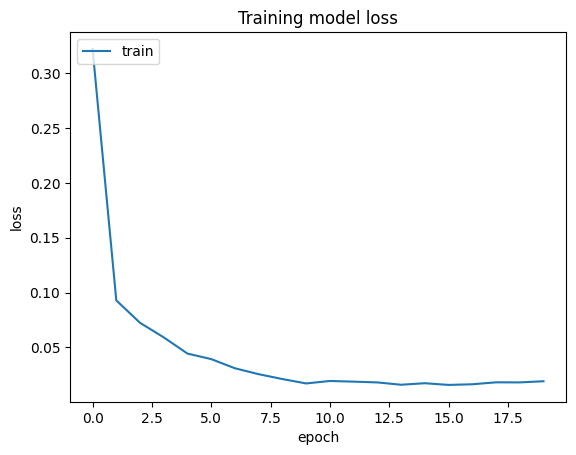

In [20]:
plt.plot(hist.history['loss'])

plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

plt.show()

In [21]:
testData = pd.read_csv('BSE.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[4:,0:].values 

#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 4
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(83, 4, 1)

In [22]:
X_test

array([[[ 0.52949639],
        [ 0.6085918 ],
        [ 0.66830467],
        [ 0.63347749]],

       [[ 0.6085918 ],
        [ 0.66830467],
        [ 0.63347749],
        [ 0.63043424]],

       [[ 0.66830467],
        [ 0.63347749],
        [ 0.63043424],
        [ 0.59193539]],

       [[ 0.63347749],
        [ 0.63043424],
        [ 0.59193539],
        [ 0.62607885]],

       [[ 0.63043424],
        [ 0.59193539],
        [ 0.62607885],
        [ 0.58125783]],

       [[ 0.59193539],
        [ 0.62607885],
        [ 0.58125783],
        [ 0.48647485]],

       [[ 0.62607885],
        [ 0.58125783],
        [ 0.48647485],
        [ 0.48814194]],

       [[ 0.58125783],
        [ 0.48647485],
        [ 0.48814194],
        [ 0.61494596]],

       [[ 0.48647485],
        [ 0.48814194],
        [ 0.61494596],
        [ 0.65875305]],

       [[ 0.48814194],
        [ 0.61494596],
        [ 0.65875305],
        [ 0.68265391]],

       [[ 0.61494596],
        [ 0.65875305],
        [ 0.68

In [23]:
y_pred=model.predict(X_test)

3/3 [==============================] - 1s 5ms/step


In [24]:
y_pred

array([[0.5093656 ],
       [0.5559716 ],
       [0.5719436 ],
       [0.55169964],
       [0.5427153 ],
       [0.5255524 ],
       [0.5175186 ],
       [0.4784316 ],
       [0.454777  ],
       [0.4935361 ],
       [0.56538516],
       [0.59527254],
       [0.615932  ],
       [0.6415895 ],
       [0.676011  ],
       [0.73185277],
       [0.76758647],
       [0.72098947],
       [0.70637566],
       [0.74097604],
       [0.7748939 ],
       [0.78154135],
       [0.79930246],
       [0.8235678 ],
       [0.8462318 ],
       [0.8511432 ],
       [0.7897016 ],
       [0.75061655],
       [0.71644163],
       [0.7000345 ],
       [0.64953977],
       [0.624753  ],
       [0.60604954],
       [0.62266535],
       [0.6542767 ],
       [0.6738881 ],
       [0.6682081 ],
       [0.64451635],
       [0.628668  ],
       [0.5833319 ],
       [0.5397781 ],
       [0.5620113 ],
       [0.5459361 ],
       [0.5418086 ],
       [0.53996456],
       [0.5490862 ],
       [0.51985216],
       [0.457

In [25]:
int(y_test[0])  #Actual Price

60743

In [26]:
predicted_price=sc.inverse_transform(y_pred)

In [27]:
int(predicted_price[0]) #Predicted stock price

59911

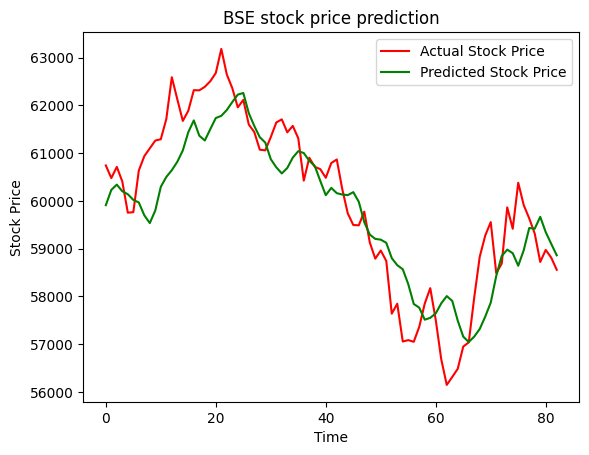

In [28]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')   
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')

plt.title('BSE stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# NEWS SENTIMENT ANALYSIS

# Import library

In [29]:

import pandas as pd
dataset=pd.read_csv('StockNew.csv',encoding="ISO-8859-1")   #Encoding needed for utf
dataset
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4101 non-null   object
 1   Label   4101 non-null   int64 
 2   Top1    4101 non-null   object
 3   Top2    4101 non-null   object
 4   Top3    4101 non-null   object
 5   Top4    4101 non-null   object
 6   Top5    4101 non-null   object
 7   Top6    4101 non-null   object
 8   Top7    4101 non-null   object
 9   Top8    4101 non-null   object
 10  Top9    4101 non-null   object
 11  Top10   4101 non-null   object
 12  Top11   4101 non-null   object
 13  Top12   4101 non-null   object
 14  Top13   4101 non-null   object
 15  Top14   4101 non-null   object
 16  Top15   4101 non-null   object
 17  Top16   4101 non-null   object
 18  Top17   4101 non-null   object
 19  Top18   4101 non-null   object
 20  Top19   4101 non-null   object
 21  Top20   4101 non-null   object
 22  Top21   4101 non-null   

# Create Train and Test Dataset

In [30]:

train=dataset[dataset['Date'] < '20150101'] # Before this date put everything into train and test dataset
test=dataset[dataset['Date'] > '20141231']

# Data Cleaning

In [31]:

#Removing Punctuation
data=train.iloc[:,2:27] #0th col is data and 1th is label so no need there
data.replace("^a-zA-Z"," ",regex=True,inplace=True) #Apart from a-z or A-Z replace everything with blank space

In [32]:
# Renaming columns names for those ease of access
list1=[i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns=new_Index

In [33]:
data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,"Brazil declares emergency after 2,400 babies a...",Scientists find big 1500-yr-old Viking settlem...,Paris attacks: Belgian police arrest ninth sus...,Wiretapping reveals communication between Turk...,Russia airstrikes: Hundreds of Syrian civilans...,Pakistan changes neutral position on Syrian Ci...,North Korean diplomat arrested in South Africa...,German teachers want 'Mein Kampf' on syllabus,North Korea slave force earns Kim Jong Un regi...,"50,000 Yemeni Forces Preparing to Attack Saudi...",...,Report on sexual exploitation and abuse by pea...,Baby girl dies after X-president's son's staff...,China smog sparks r

In [34]:

# Converting headlines into lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head()
# Combining data to convert it into one para(25 headlines belong one company)
' '.join(str(x) for x in data.iloc[1,0:25]) # For only first row 
# Combining the records for whole columns(For every value)
headlines=[]
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))


In [35]:
headlines[0]

"a 'hindrance to operations': extracts from the leaked reports scorecard hughes' instant hit buoys blues jack gets his skates on at ice-cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton's party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar's debut double southgate strikes, leeds pay the penalty hammers hand robson a youthful lesson saints party like it's 1999 wear wolves have turned into lambs stump mike catches testy gough's taunt langer escapes to hit 167 flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl's successor drawn into scandal the difference between men and women sara denver, nurse turned solicitor diana's landmine crusade put tories in a panic yeltsin's resignation caught opposition flat-footed russian roulette sold out recovering a title"

# CountVectorizer

In [36]:

from sklearn.feature_extraction.text import CountVectorizer #Convert sentence to vector
from sklearn.ensemble import RandomForestClassifier

# Implement Bag of Words

In [37]:

countVector=CountVectorizer(ngram_range=(2,2))
traindataset=countVector.fit_transform(headlines)
traindataset[0] #Sparse matrix is combination of 0 and 1


<1x598616 sparse matrix of type '<class 'numpy.int64'>'
	with 140 stored elements in Compressed Sparse Row format>

# Implementing RandomForest Classifier

In [38]:
randomclassifer=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifer.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

# Predict for the test Dataset

In [39]:
# Performing the same steps as with train dataset
test_transform=[]
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))    #join
test_dataset=countVector.transform(test_transform)

predictions=randomclassifer.predict(test_dataset)
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Checking Accuracy

Accuracy 84.12698412698413 %
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       186
           1       0.78      0.95      0.86       192

    accuracy                           0.84       378
   macro avg       0.86      0.84      0.84       378
weighted avg       0.86      0.84      0.84       378



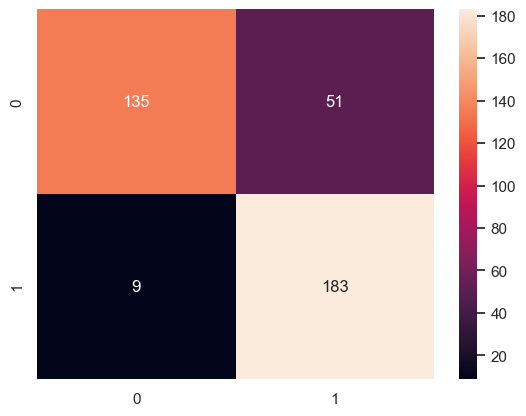

In [41]:
import seaborn as sns

sns.set()
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
matrix=confusion_matrix(test['Label'],predictions)
# print(matrix)

from __future__ import annotations

cm=sns.heatmap(matrix,annot=True,fmt="d")


score=accuracy_score(test['Label'],predictions)
print("Accuracy",score*100,"%")

report=classification_report(test['Label'],predictions)
print(report)